In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
sns.set(style='white', context='notebook', palette='deep')
np.random.seed(2)

In [4]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

In [6]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
X_train = X_train / 255.0
test = test / 255.0

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

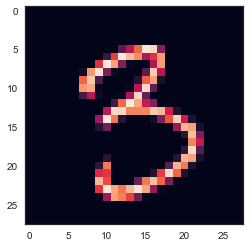

In [17]:
g = plt.imshow(X_train[9][:,:,0])

In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [23]:
# Define the optimizer
optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0)

In [24]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
epochs = 5
batch_size = 64

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [27]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/5
 - 217s - loss: 1.8641 - acc: 0.3410 - val_loss: 0.5560 - val_acc: 0.8583
Epoch 2/5
 - 218s - loss: 0.7747 - acc: 0.7465 - val_loss: 0.1898 - val_acc: 0.9481
Epoch 3/5
 - 224s - loss: 0.4380 - acc: 0.8618 - val_loss: 0.1323 - val_acc: 0.9605
Epoch 4/5
 - 219s - loss: 0.3300 - acc: 0.8962 - val_loss: 0.1068 - val_acc: 0.9700
Epoch 5/5
 - 233s - loss: 0.2802 - acc: 0.9143 - val_loss: 0.0915 - val_acc: 0.9726


In [29]:
results = model.predict(test)
# select with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
results

0        2
1        0
2        9
3        0
4        3
5        9
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    7
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64